 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [187]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [188]:
# Reading whale returns
whale_data = Path("./Resources/whale_returns.csv")

#whale_df  = pd.read_csv(whale_data, index_col = "Date")
#whale_df.head()
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df= whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [189]:
# Count nulls
null_count = whale_df.isnull().sum()
null_count.head()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [190]:
# Drop nulls

whale_df = whale_df.dropna().copy()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [191]:
# Reading algorithmic returns
algo_returns = Path("./Resources/algo_returns.csv")

algo_returns_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df= algo_returns_df.sort_index()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [192]:
# Count nulls
null_count = algo_returns_df.isnull().sum()
null_count.head()

Algo 1    0
Algo 2    6
dtype: int64

In [193]:
# Drop nulls

algo_returns_df = algo_returns_df.dropna().copy()
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [194]:
# Reading S&P 500 Closing Prices
sp500_history = Path("./Resources/sp500_history.csv")

sp500_history_df = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df= sp500_history_df.sort_index()
sp500_history_df.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [195]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [196]:
# Fix Data Types

#sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")

sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace(",", "")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")
sp500_history_df.dtypes
sp500_history_df.dtypes

Close    float64
dtype: object

In [197]:
# Calculate Daily Return

daily_return = sp500_history_df.pct_change()
daily_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [198]:
# Drop nulls

daily_return = daily_return.dropna().copy()
daily_return.isnull().sum()

Close    0
dtype: int64

In [199]:
# Rename `Close` Column to be specific to this portfolio.
daily_return = daily_return.rename(columns={"Close":"SP500_Close"})
daily_return.head()

,SP500_Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [200]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([algo_returns_df, whale_df, daily_return], axis = "columns", join = "inner")

combined_df.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500_Close
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.004389
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001196
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily_returns'}, xlabel='Date'>

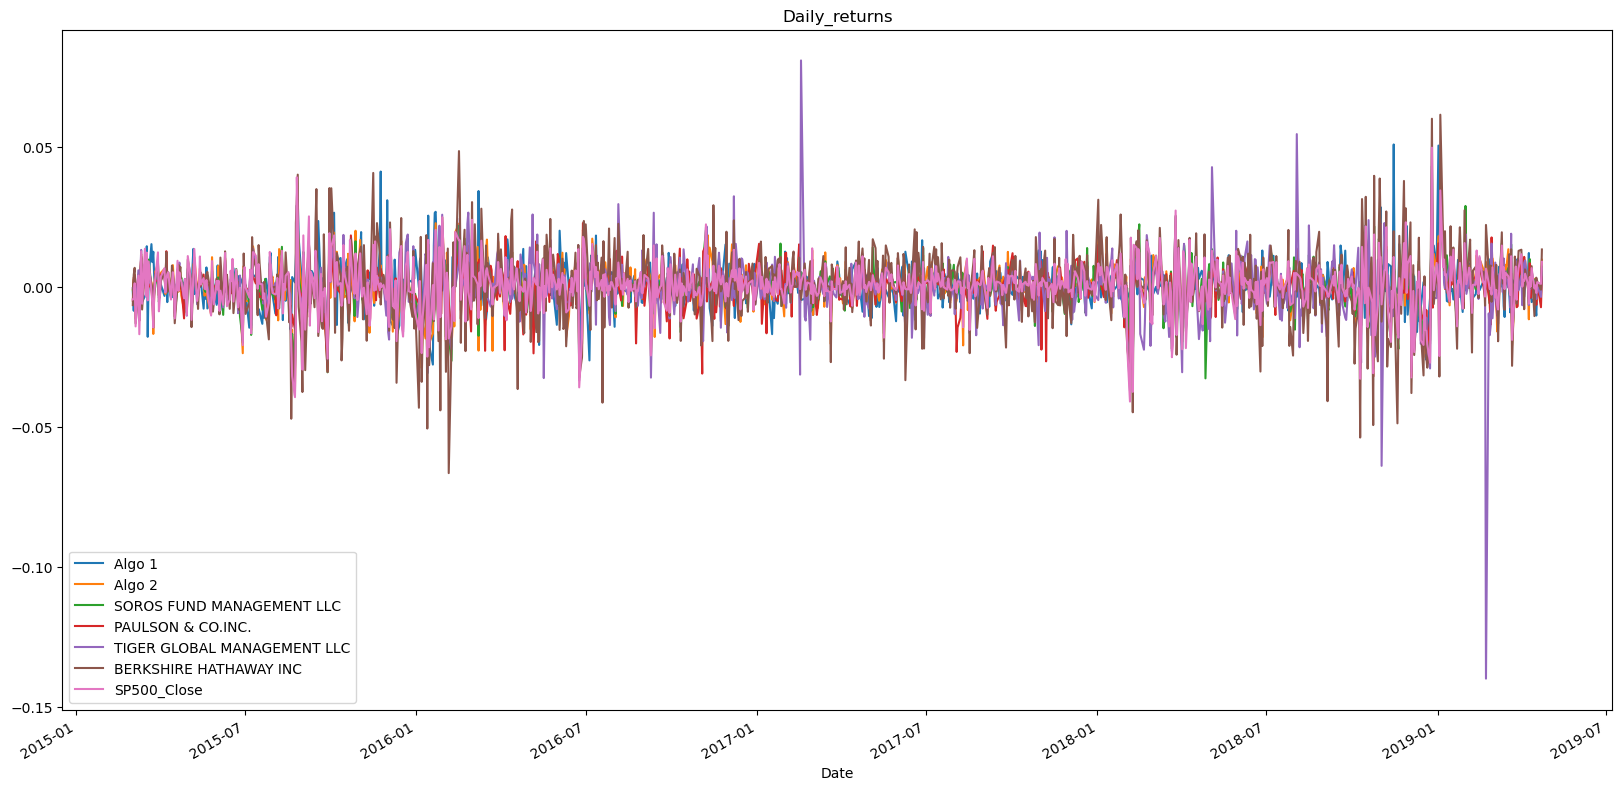

In [201]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10),title="Daily_returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative_returns'}, xlabel='Date'>

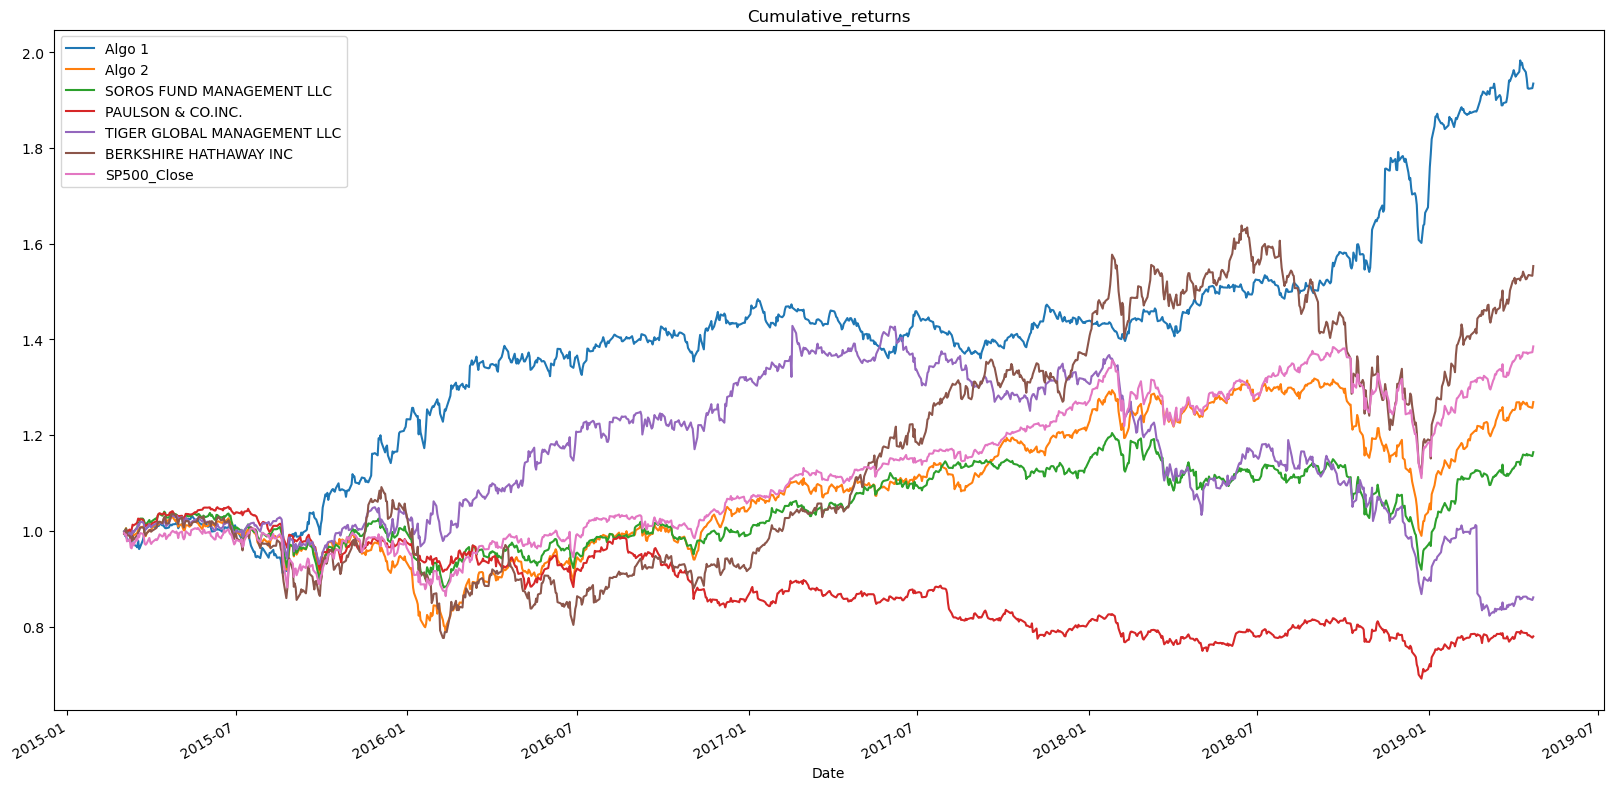

In [202]:
# Calculate cumulative returns of all portfolios
Cumulative_returns = (1 + combined_df).cumprod()
# Plot cumulative returns
Cumulative_returns.plot(figsize=(20,10),title="Cumulative_returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Port_risk'}>

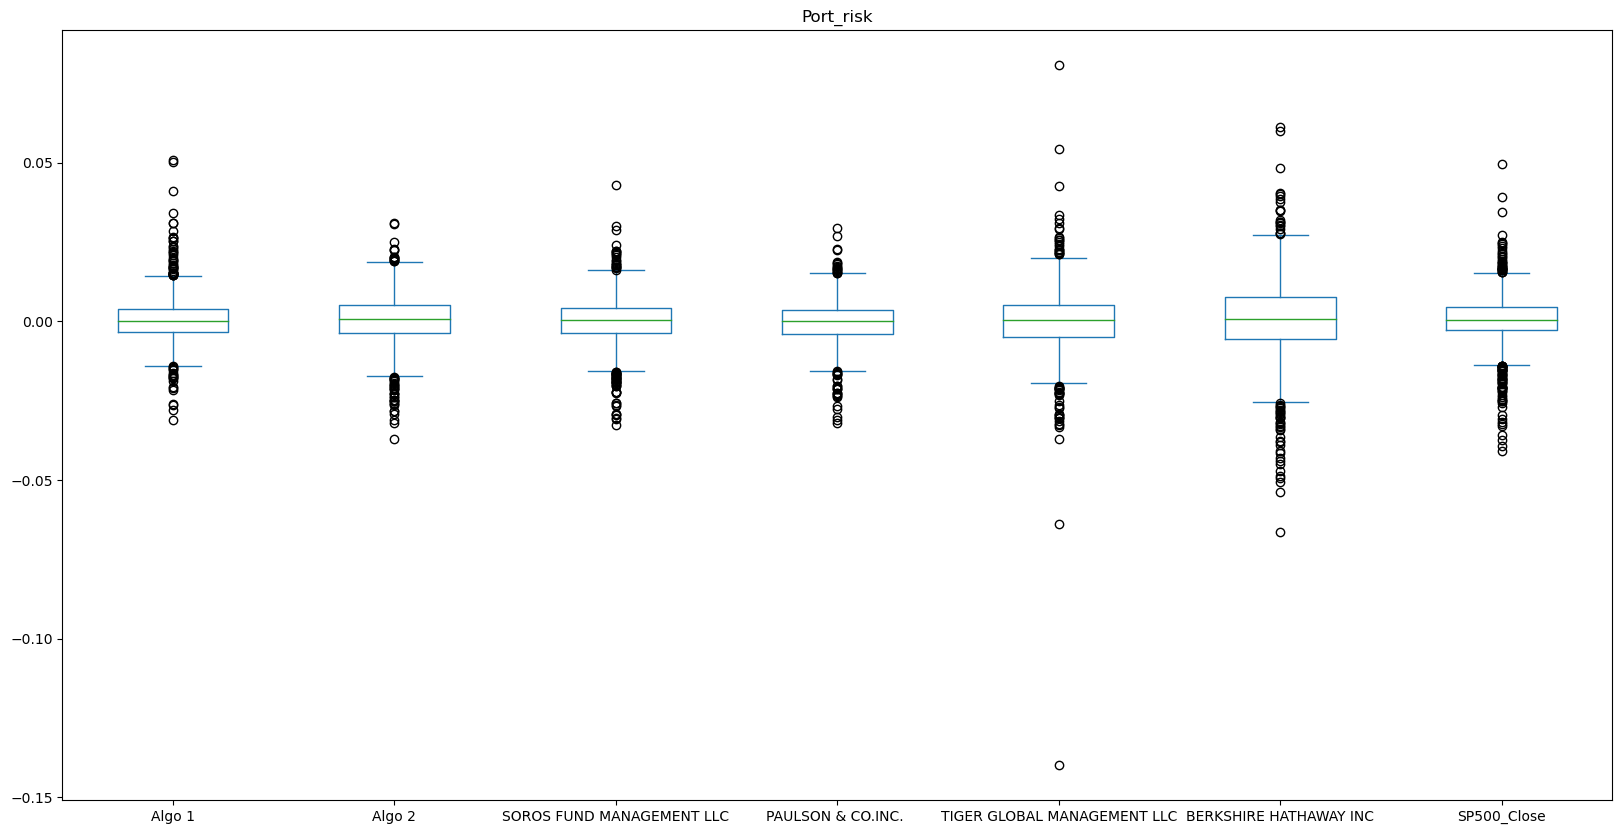

In [203]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10),title="Port_risk")

### Calculate Standard Deviations

##### Calculate the daily standard deviations of all portfolios
combined_df.std()

### Determine which portfolios are riskier than the S&P 500

In [204]:
# Calculate  the daily standard deviation of S&P 500

sp500_risk_calc = combined_df["SP500_Close"].std()

# Determine which portfolios are riskier than the S&P 500
combined_df.std()>sp500_risk_calc

Algo 1                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
SP500_Close                    False
dtype: bool

### Calculate the Annualized Standard Deviation

In [205]:
# Calculate the annualized standard deviation (252 trading days)
Annul_std = combined_df.std()*np.sqrt(252)
Annul_std

Algo 1                         0.120967
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
SP500_Close                    0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

##### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day STD'}, xlabel='Date'>

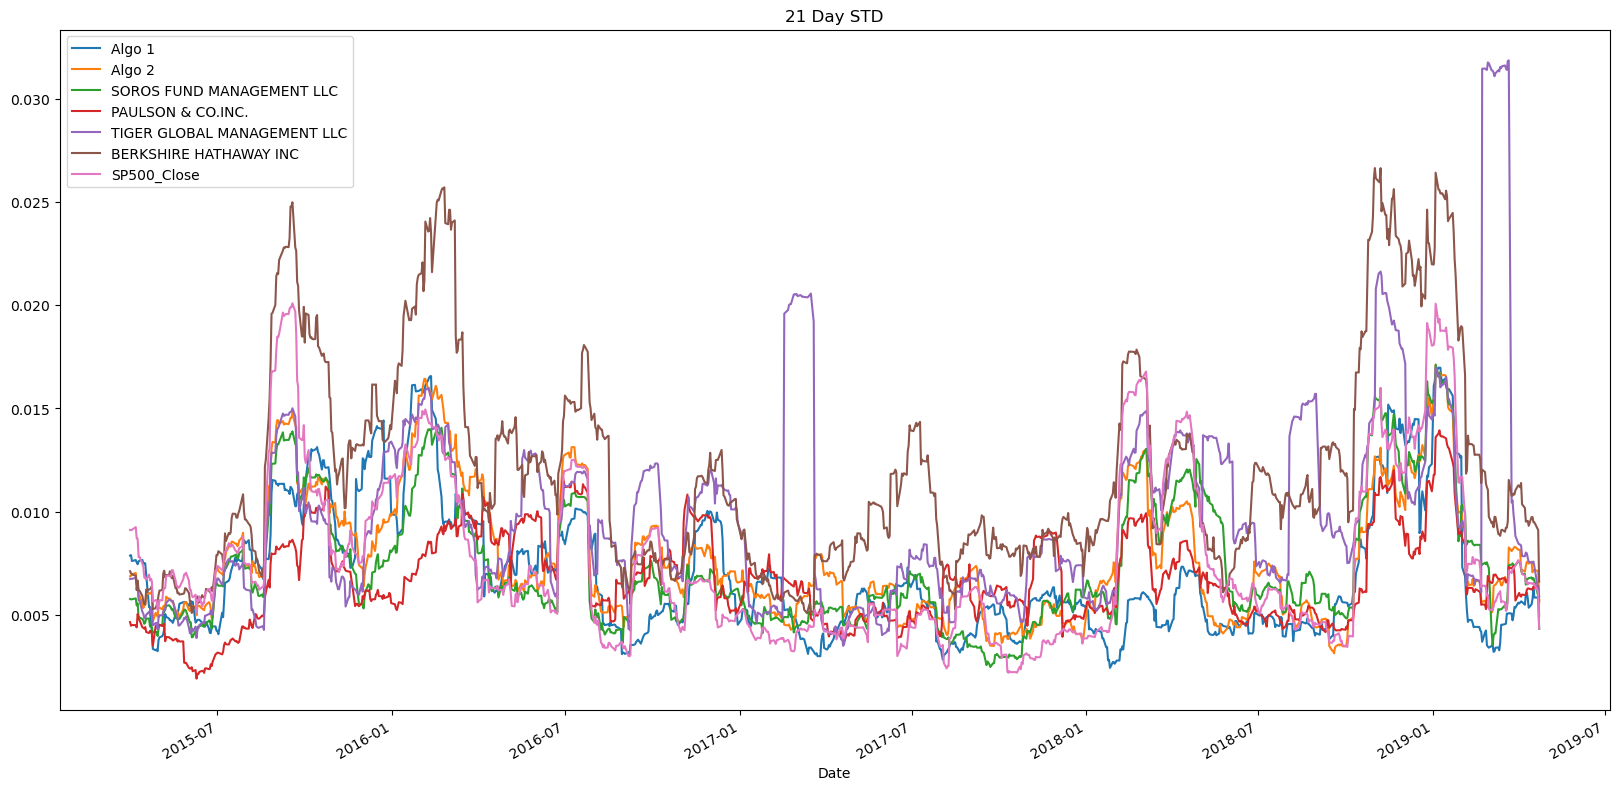

In [206]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(title="21 Day STD", figsize=(20,10))

### Calculate and plot the correlation

In [207]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
correlation

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500_Close
Algo 1,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033,0.279494
Algo 2,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082,0.858764
SOROS FUND MANAGEMENT LLC,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360,0.837864
PAULSON & CO.INC.,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423,0.623946
BERKSHIRE HATHAWAY INC,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000,0.751371
SP500_Close,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371,1.000000


<AxesSubplot:>

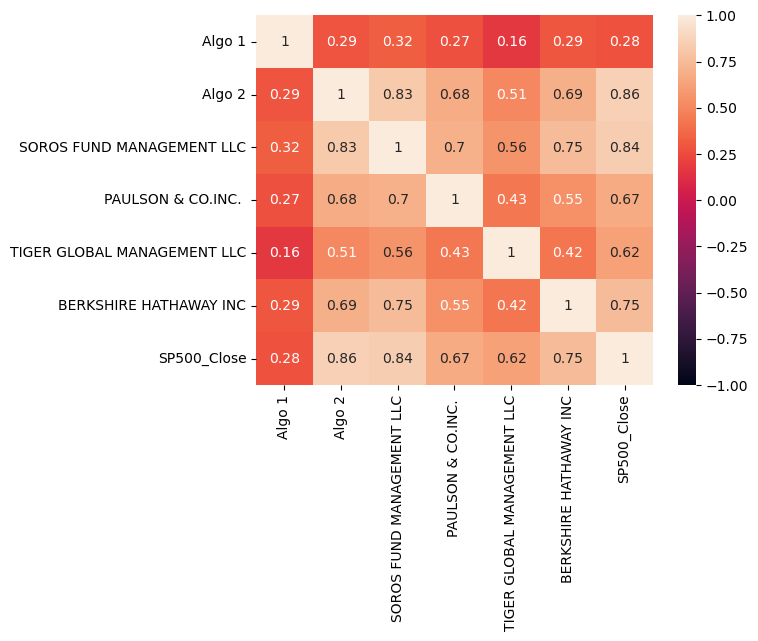

In [208]:
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

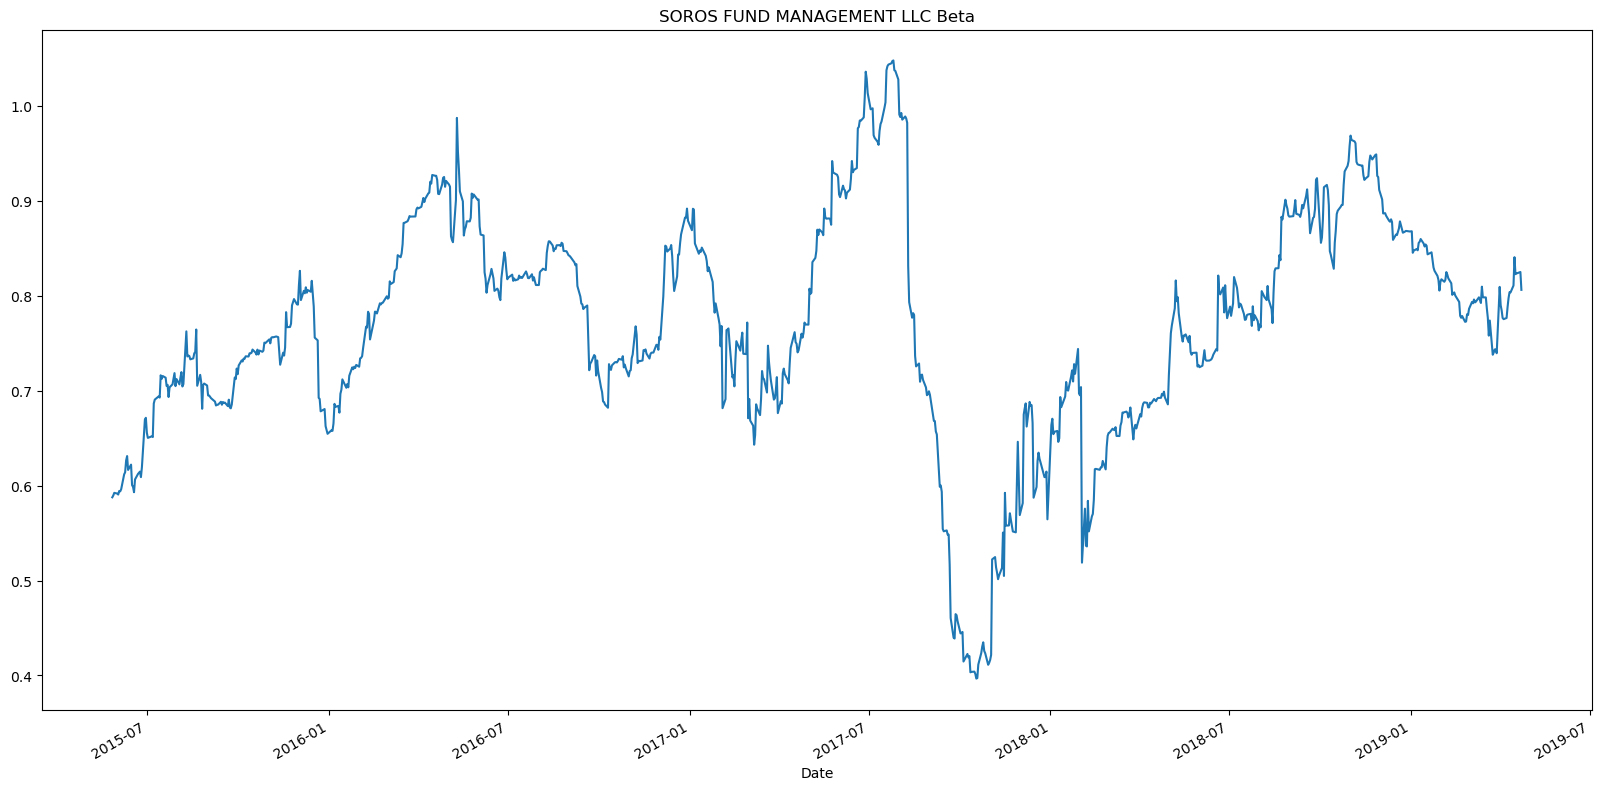

In [209]:
# Calculate covariance of a single portfolio
SOROS_FUND_MANAGEMENT_LLC_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['SP500_Close'])
SOROS_FUND_MANAGEMENT_LLC_covariance
# Calculate variance of S&P 500
variance = combined_df['SP500_Close'].rolling(window=60).var()
variance
# Computing beta
SOROS_FUND_MANAGEMENT_LLC_beta = SOROS_FUND_MANAGEMENT_LLC_covariance / variance
# Plot beta trend
SOROS_FUND_MANAGEMENT_LLC_beta_plot = SOROS_FUND_MANAGEMENT_LLC_beta.plot(title="SOROS FUND MANAGEMENT LLC Beta", figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponential Weighted Average'}, xlabel='Date'>

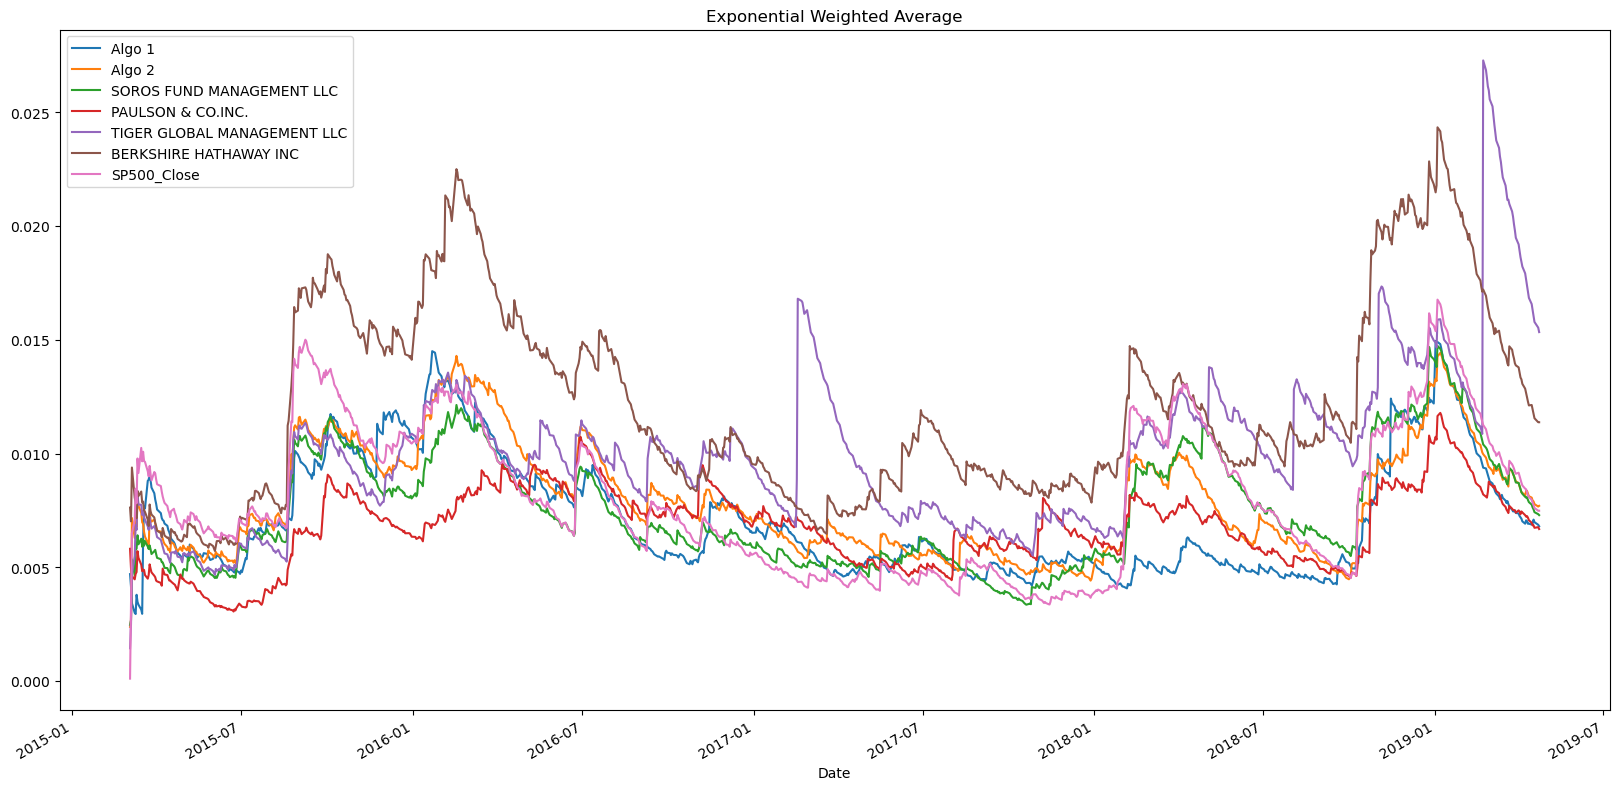

In [210]:
# Use `ewm` to calculate the rolling window
rolling_window_ewm = combined_df.ewm(halflife=21, adjust=True).std().plot(title="Exponential Weighted Average", figsize=(20, 10))
rolling_window_ewm

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [211]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

Algo 1                         1.378648
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
SP500_Close                    0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios Bar plot'}>

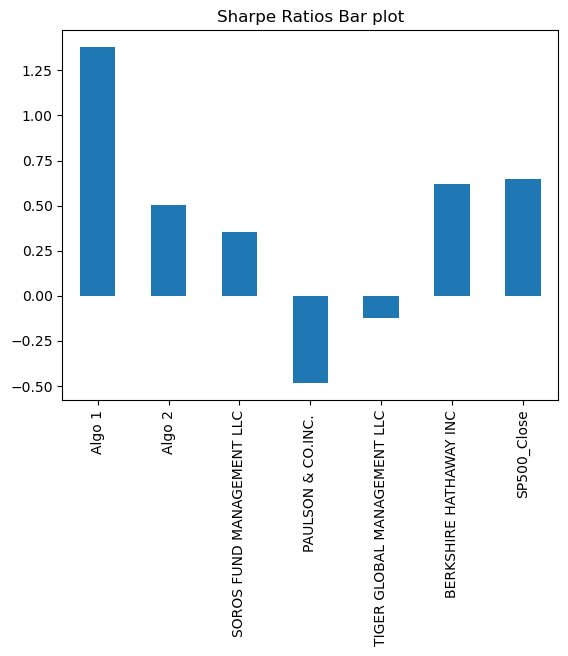

In [212]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios Bar plot")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [213]:
# Reading data from 1st stock

goog_history_df = pd.read_csv("./Resources/goog_historical.csv", index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_history_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [214]:
# Drop symbol column
goog_history_df=goog_history_df.drop(columns=['Symbol'])
goog_history_df.head()

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [215]:
# Reading data from 2nd stock
cost_history_df = pd.read_csv("./Resources/cost_historical.csv", index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_history_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [216]:
# Drop symbol column
cost_history_df=cost_history_df.drop(columns=['Symbol'])
cost_history_df.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [217]:
# Reading data from 3rd stock
aapl_history_df = pd.read_csv("./Resources/aapl_historical.csv", index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_history_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [218]:
# Drop Aapl symbol column
aapl_history_df=aapl_history_df.drop(columns=['Symbol'])
aapl_history_df.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [219]:
# Combine all stocks in a single DataFrame
combined_stocks_df = pd.concat([goog_history_df, cost_history_df, aapl_history_df], axis="columns", join="inner")

In [220]:
# Reset Date index
combined_stocks_df.sort_index(inplace=True)

In [221]:
# Reorganize portfolio data by having a column per symbol
combined_stocks_df.columns = ['Google', 'Costco', 'Apple']

In [222]:
combined_stocks_df.head()

,Google,Costco,Apple
Trade DATE,,,
2018-05-11,1098.26,195.76,188.59
2018-05-14,1100.20,195.88,188.15
2018-05-15,1079.23,195.48,186.44
2018-05-16,1081.77,198.71,188.18
2018-05-17,1078.59,199.60,186.99


In [223]:
# Calculate daily returns
combined_stocks_df.dropna()
combined_stocks_returns = combined_stocks_df.pct_change()
# Drop NAs
combined_stocks_returns.dropna(inplace=True)
# Display sample data
combined_stocks_returns.head()

,Google,Costco,Apple
Trade DATE,,,
2018-05-14,0.001766,0.000613,-0.002333
2018-05-15,-0.019060,-0.002042,-0.009088
2018-05-16,0.002354,0.016523,0.009333
2018-05-17,-0.002940,0.004479,-0.006324
2018-05-18,-0.011339,-0.003206,-0.003637


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [224]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
combined_stocks_weighted_returns = combined_stocks_returns.dot(weights)
combined_stocks_weighted_returns = combined_stocks_weighted_returns.rename("My_Stocks")
# Display sample data
combined_stocks_weighted_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
Name: My_Stocks, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [225]:
# Join your returns DataFrame to the original returns DataFrame
combined_added_df = pd.concat([algo_returns_df, whale_df, daily_return,combined_stocks_weighted_returns], axis = "columns", join = "inner")

combined_added_df.head()


,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500_Close,My_Stocks
2018-05-14,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.000884,0.000015
2018-05-15,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842,-0.010064
2018-05-16,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.004061,0.009403
2018-05-17,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,-0.000856,-0.001595
2018-05-18,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212,-0.002632,-0.006061


In [226]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_added_df.dropna(inplace=True)
combined_added_df.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500_Close,My_Stocks
2018-05-14,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.000884,0.000015
2018-05-15,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.006842,-0.010064
2018-05-16,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.004061,0.009403
2018-05-17,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,-0.000856,-0.001595
2018-05-18,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212,-0.002632,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [227]:
# Calculate the annualized `std`

combined_added_df_daily_std = combined_added_df.std().sort_values(ascending=False)
combined_added_df_daily_std

BERKSHIRE HATHAWAY INC         0.015569
TIGER GLOBAL MANAGEMENT LLC    0.014648
My_Stocks                      0.013323
SP500_Close                    0.009578
SOROS FUND MANAGEMENT LLC      0.009240
Algo 2                         0.008791
Algo 1                         0.008423
PAULSON & CO.INC.              0.007353
dtype: float64

In [228]:
combined_added_df_annualized_std = combined_added_df_daily_std *np.sqrt(252)
combined_added_df_annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.247155
TIGER GLOBAL MANAGEMENT LLC    0.232531
My_Stocks                      0.211496
SP500_Close                    0.152054
SOROS FUND MANAGEMENT LLC      0.146675
Algo 2                         0.139556
Algo 1                         0.133704
PAULSON & CO.INC.              0.116732
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}>

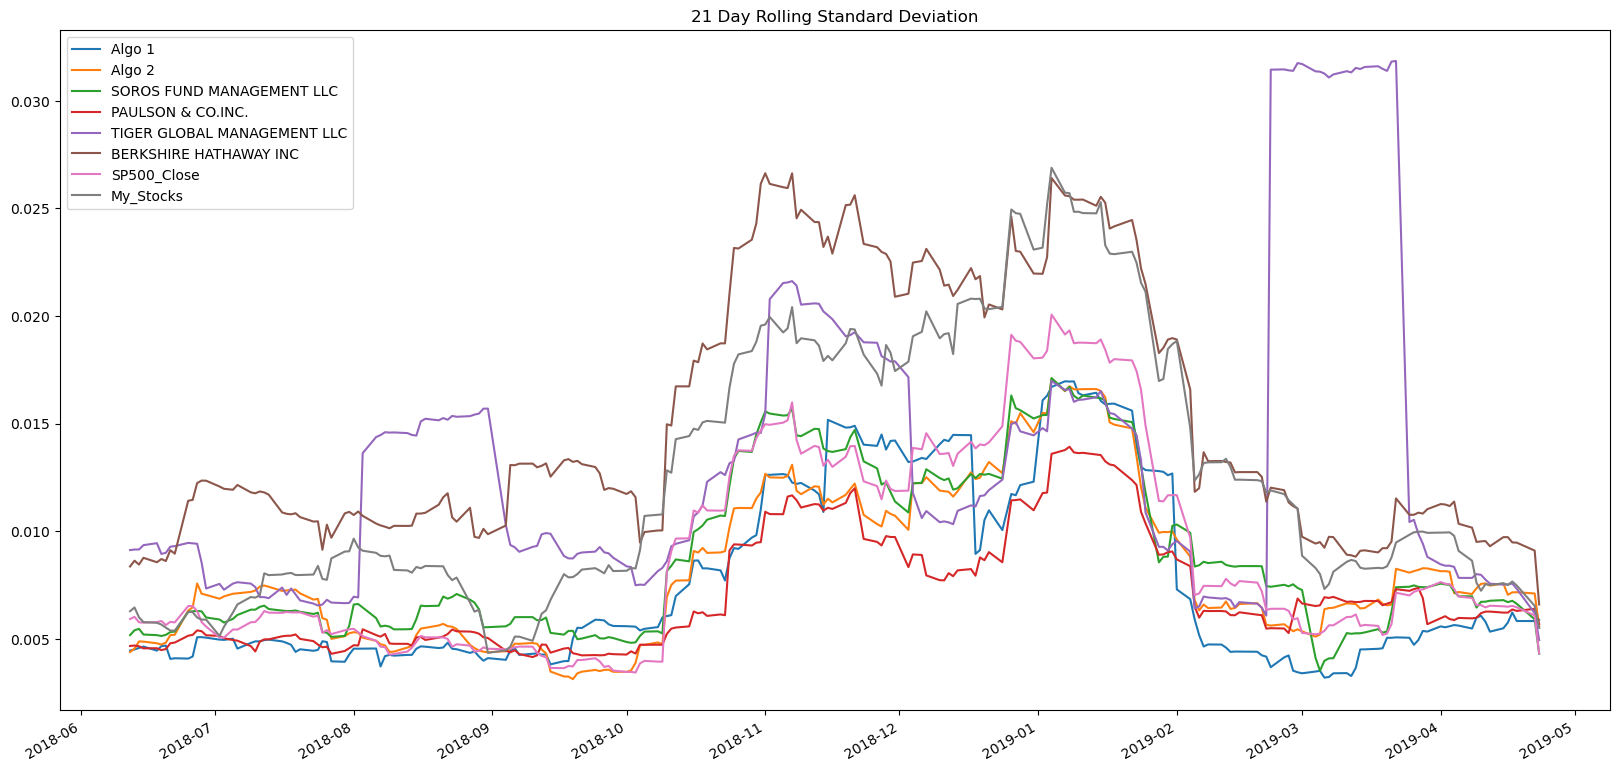

In [229]:
# Calculate and plot rolling std with 21-day window

combined_added_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

### Calculate and plot the correlation

In [230]:
# Calculate and plot the correlation
combined_added_df_correlation = combined_added_df.corr()
combined_added_df_correlation

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,SP500_Close,My_Stocks
Algo 1,1.000000,0.365512,0.337826,0.361301,0.114554,0.327000,0.289358,0.261471
Algo 2,0.365512,1.000000,0.862846,0.783656,0.409496,0.782804,0.875721,0.739936
SOROS FUND MANAGEMENT LLC,0.337826,0.862846,1.000000,0.791962,0.478627,0.816675,0.876981,0.733250
PAULSON & CO.INC.,0.361301,0.783656,0.791962,1.000000,0.485375,0.650758,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.114554,0.409496,0.478627,0.485375,1.000000,0.325457,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.327000,0.782804,0.816675,0.650758,0.325457,1.000000,0.852303,0.801158
SP500_Close,0.289358,0.875721,0.876981,0.766680,0.481030,0.852303,1.000000,0.871875
My_Stocks,0.261471,0.739936,0.733250,0.644210,0.391972,0.801158,0.871875,1.000000


<AxesSubplot:>

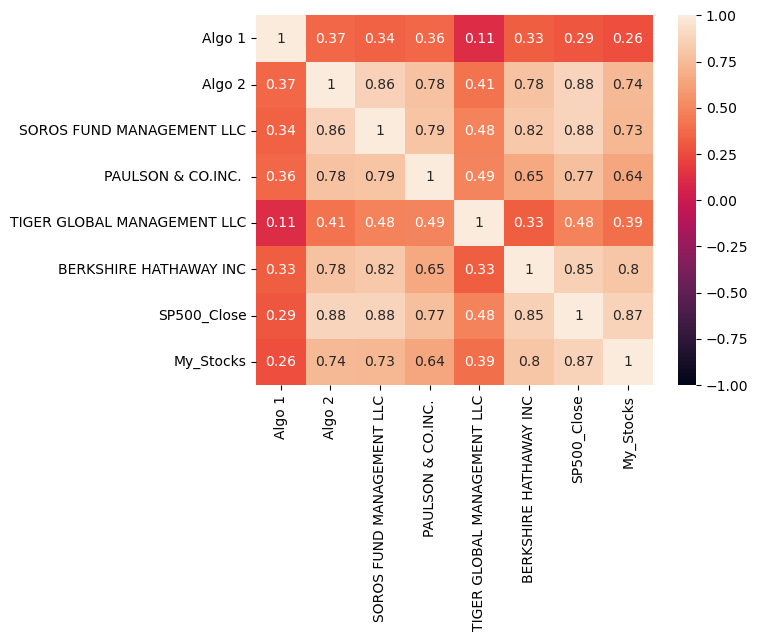

In [232]:
sns.heatmap(combined_added_df_correlation,  vmin=-1, vmax=1,annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta
custom_covariance = combined_portfolios_2_df['Custom'].rolling(window=60).cov(combined_portfolios_2_df['S&P500'])
custom_covariance

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [235]:
# Calculate Annualized Sharpe Ratios
combined_added_df_sharpe_ratios = (combined_added_df.mean() * 252) / (combined_added_df.std() * np.sqrt(252))
combined_added_df_sharpe_ratios.sort_values(ascending=False)

Algo 1                         2.035665
My_Stocks                      0.933123
SP500_Close                    0.584820
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
BERKSHIRE HATHAWAY INC         0.159756
Algo 2                         0.080607
TIGER GLOBAL MANAGEMENT LLC   -1.034216
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

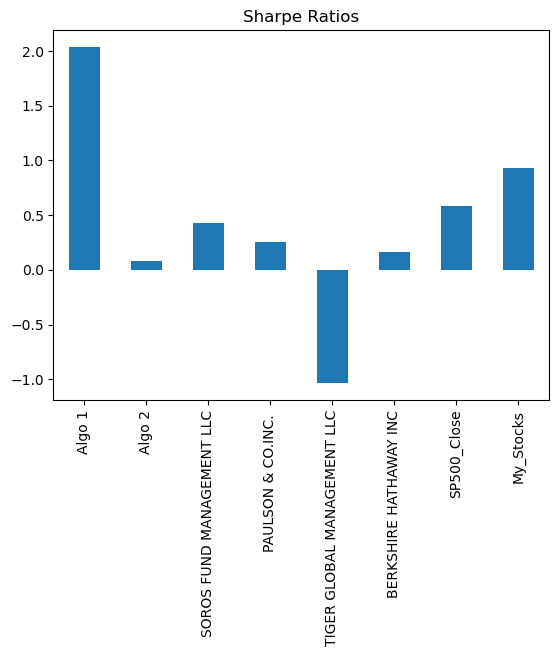

In [236]:
# Visualize the sharpe ratios as a bar plot
combined_added_df_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!